In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("unilever-stock-2010-2024.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-01,30.469999,31.260000,28.219999,29.440001,18.023182,28915000
1,2010-03-01,29.490000,30.360001,28.200001,29.280001,18.094006,32822600
2,2010-04-01,30.139999,30.750000,29.049999,30.100000,18.600739,24332800
3,2010-05-01,30.209999,30.290001,25.740000,27.040001,16.709763,34902100
4,2010-06-01,27.139999,28.830000,26.730000,26.730000,16.681154,30097400


In [3]:
df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(["Date", "Open", "High", "Low", "Adj Close", "Volume"], axis=1, inplace=True)

In [4]:
sns.set()

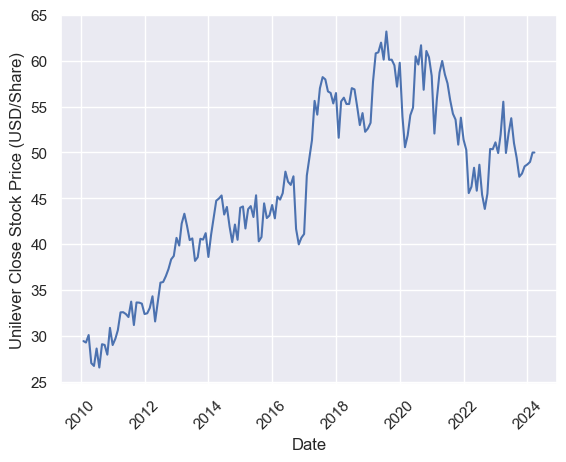

In [5]:
plt.ylabel('Unilever Close Stock Price (USD/Share)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(df.index, df['Close'], )

### Train Test Split

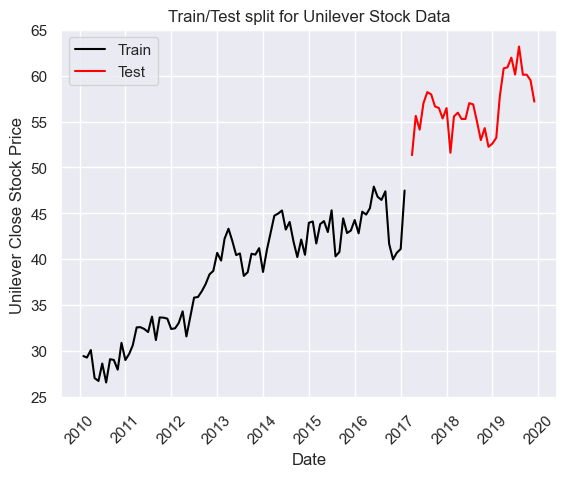

In [6]:
train = df[df.index < pd.to_datetime("2017-03-01", format='%Y-%m-%d')]
test = df[(df.index > pd.to_datetime("2017-03-01", format='%Y-%m-%d')) & (df.index < pd.to_datetime("2020-01-01", format='%Y-%m-%d'))]

plt.plot(train, color = "black", label= "Train")
plt.plot(test, color = "red", label = "Test")
plt.ylabel('Unilever Close Stock Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Unilever Stock Data")
plt.legend(loc='best')
plt.show()

### NAIVE METHOD

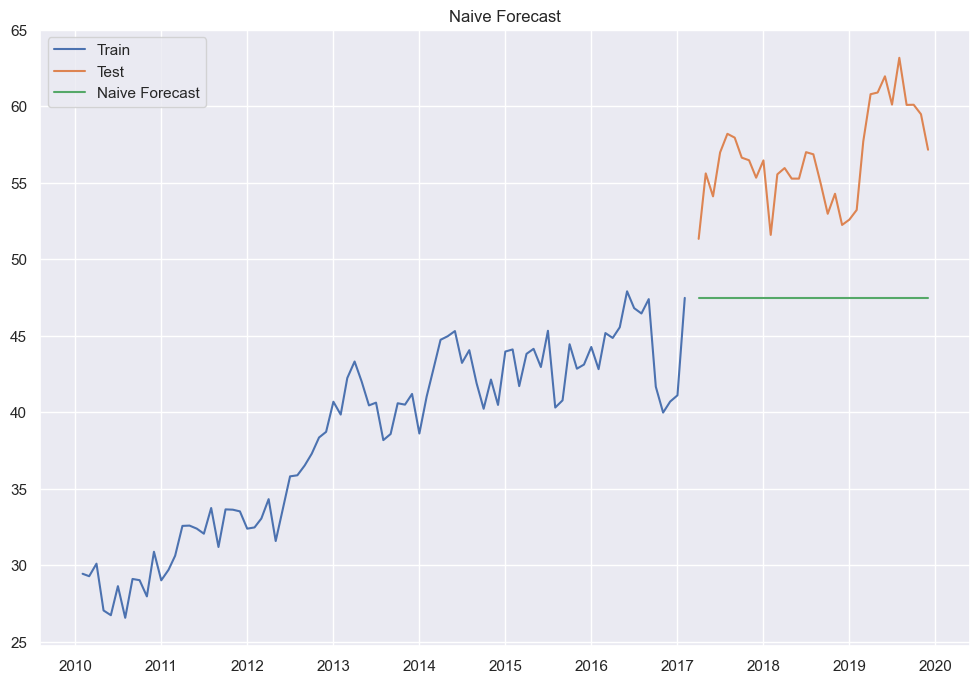

In [7]:
dd= np.asarray(train.Close)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Close, y_hat.naive))
print('RMSE with naive approach : ', rms)

RMSE with naive approach :  9.619885873133981


### Simple Average method

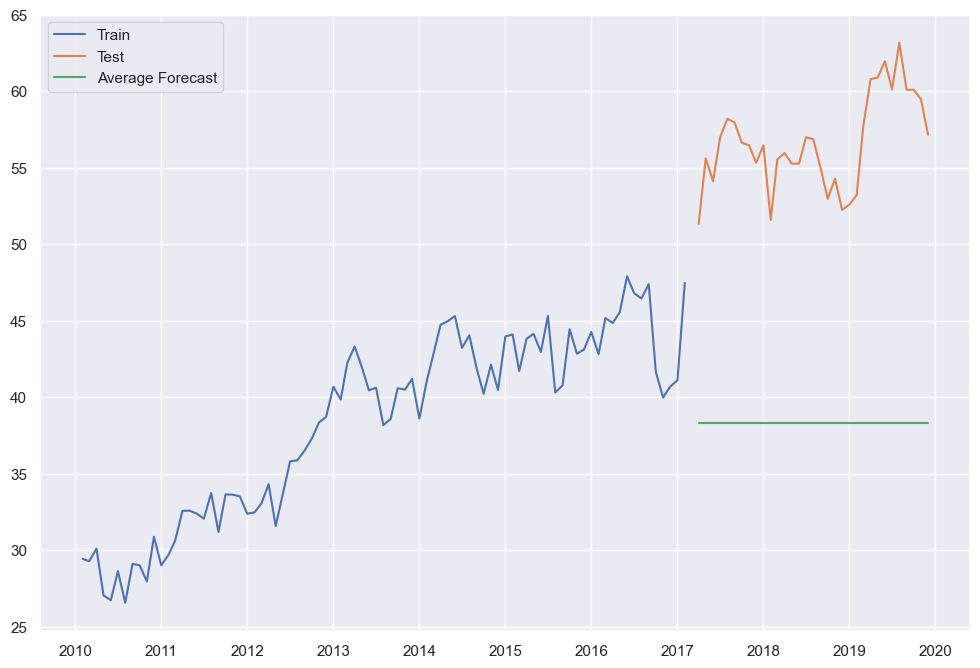

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

### Moving Average Method

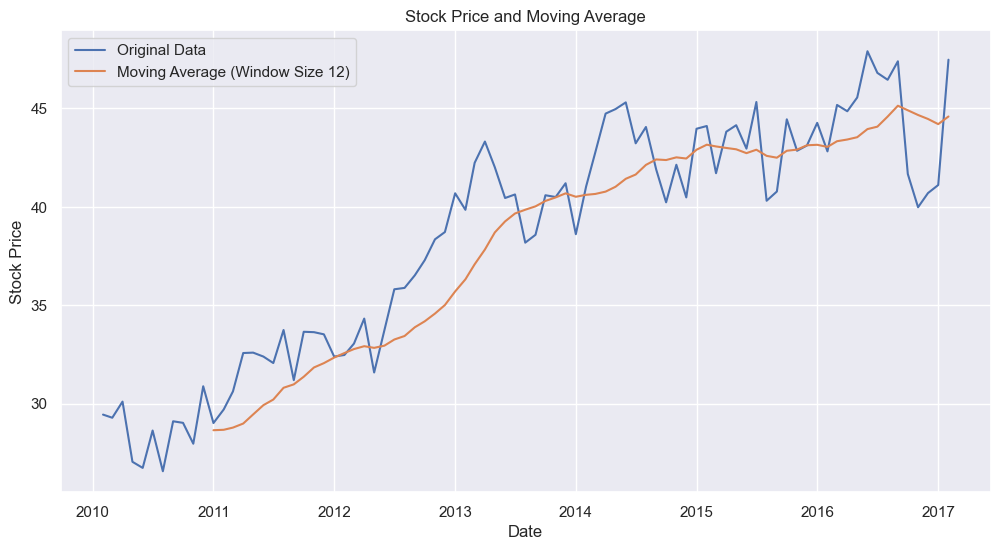

Forecasted stock price for the next time period: 44.593333666666666
Actual stock price for the next time period (test data): 58.949999749999996


In [10]:
  # Test data from mid-2017 to 2020

# Calculate moving average
window_size = 12
moving_avg = test.copy()
moving_avg = train['Close'].rolling(window=window_size).mean()

# Plotting original data and moving average
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Original Data')

plt.plot(moving_avg.index, moving_avg, label='Moving Average (Window Size 12)')
plt.title('Stock Price and Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Forecasting using moving average
forecast = moving_avg.iloc[-1]  # Forecast for the next time period is the last value of the moving average
print("Forecasted stock price for the next time period:", forecast)

# Evaluating on test data (optional)
test_moving_avg = test['Close'].rolling(window=window_size).mean()
test_forecast = test_moving_avg.iloc[-1]
print("Actual stock price for the next time period (test data):", test_forecast)

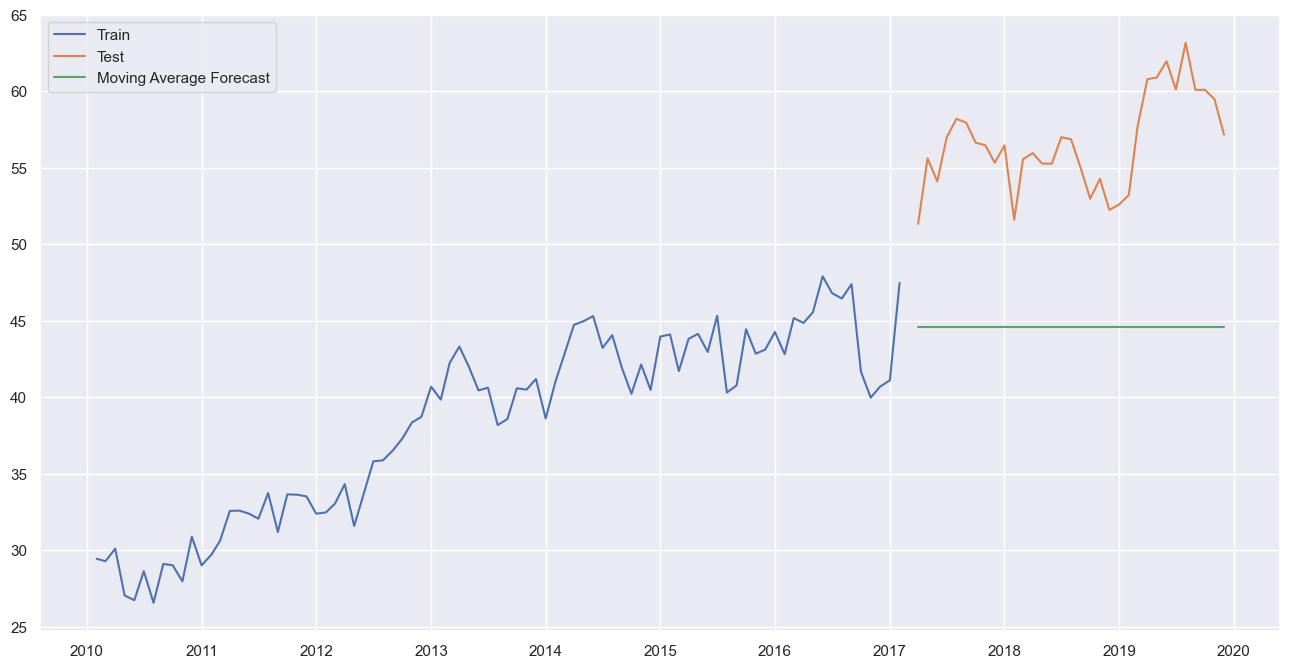

In [11]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Close'].rolling(window=12).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

### Exponential Smoothing methods

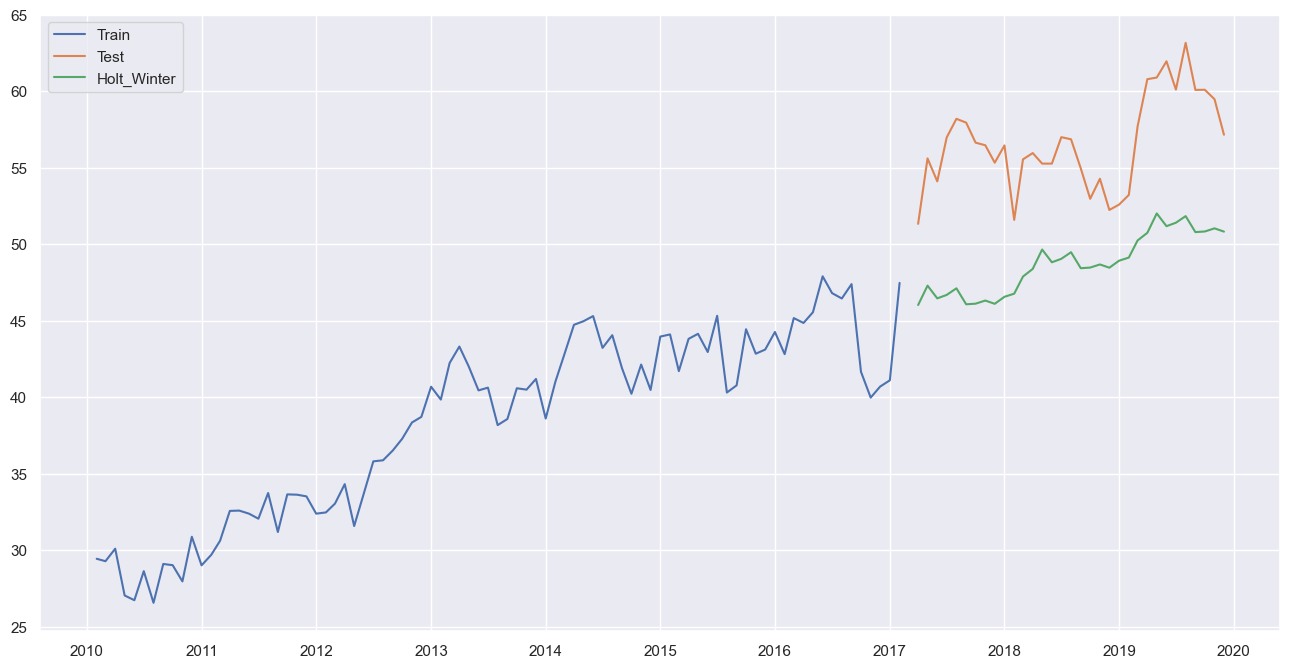

In [12]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods= 12,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

### quantitative causal using linear regression

Mean Squared Error: 0.9462536034700144
R-squared: 0.9909576031894803


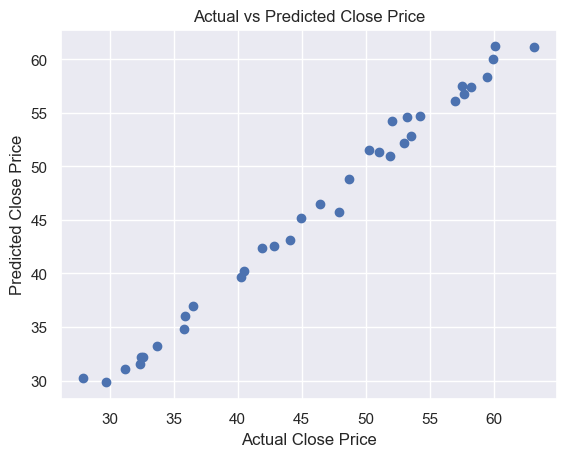

In [13]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
# Replace 'your_dataset.csv' with the path to your dataset file
data = pd.read_csv('unilever-stock-2010-2024.csv')

# Data preprocessing
# Assuming 'Date' is in proper datetime format
# If not, convert it to datetime using pd.to_datetime()

# Selecting features and target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the linear regression model
model = LinearRegression()
X_train.head
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualizing results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.show()




Text(0, 0.5, 'Close Price')

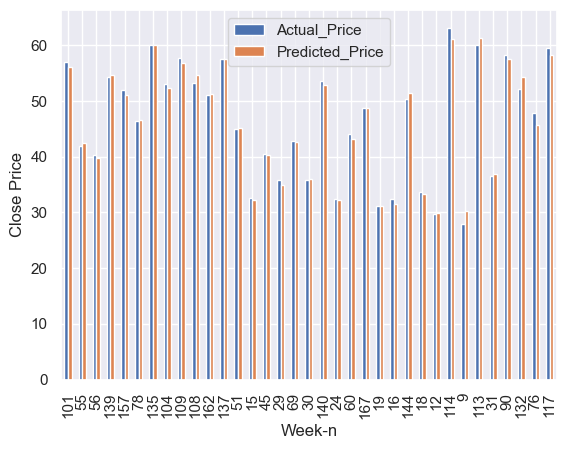

In [14]:
dfr=pd.DataFrame({'Actual_Price':y_test, 'Predicted_Price':y_pred})
dfr.plot(kind='bar')
plt.xlabel("Week-n")
plt.ylabel("Close Price")